### Importing required Libraries

In [1]:
import pandas as pd
import numpy as np

### Importing dataset

In [2]:
data = pd.read_csv('/kaggle/input/wsnds/WSN-DS.csv')
df = data.copy()
df.head()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,Normal
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,Normal
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,Normal
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,Normal
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,Normal


### Data preprocessing

In [3]:
df['Attack type'].value_counts()

Normal       340066
Grayhole      14596
Blackhole     10049
TDMA           6638
Flooding       3312
Name: Attack type, dtype: int64

<AxesSubplot:>

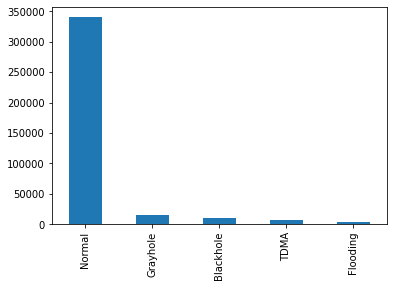

In [4]:
df['Attack type'].value_counts().plot.bar()

# Changing string labels to int
It can be done through map function or using Label Encoder (from sklearn.preprocessing)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.fruit)
df['categorical_label'] = le.transform(df.fruit)
#then to transform it back
le.inverse_transform(df['categorical_label'])
Here, map function is used.

In [5]:
df["Attack type"] = df["Attack type"].map({
    "Normal": 0,
    "Grayhole": 1,
    "Blackhole": 2,
    "TDMA": 3,
    "Flooding": 4
}.get)
df.head()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,0
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,0
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,0
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,0
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,0


## Checking for Null values

# Balancing Dataset
Now we need to balance the dataset based on the count of labels.

In [6]:
ndf= df.groupby('Attack type')
ndf= pd.DataFrame(ndf.apply(lambda x: x.sample(ndf.size().min()).reset_index(drop=True)))

In [7]:
ndf.head()

id   Time   Is_CH   who CH   Dist_To_CH   ADV_S   ADV_R  \
Attack type                                                                   
0           0  1002088   2100       0  1002100      0.00000       0       0   
            1   201041    953       0   201060     81.02206       0       1   
            2   801094   2953       0   801100      0.00000       0       0   
            3   206003   1253       0   206021      2.44936       0       3   
            4   103050    153       0   103005     19.52193       0       4   

                JOIN_S   JOIN_R   SCH_S   SCH_R  Rank   DATA_S   DATA_R  \
Attack type                                                               
0           0        0        0       0       0     0       13      104   
            1        1        0       0       1    81       15        0   
            2        0        0       0       0     0       13      377   
            3        1        0       0       1    14       55        0   
            4        1        0       0       1     1       36        0   

                Data_Sent_To_BS   dist_CH_To_BS   send_code   Expaned Energy  \
Attack type                                                                    
0           0                13        88.47785            0         0.21407   
            1                 2       107.20358            1         0.03273   
            2                13        92.58541            0         0.63885   
            3                 0         0.00000            3         0.09348   
            4                 0         0.00000            3         0.06381   

               Attack type  
Attack type                 
0           0            0  
            1            0  
            2            0  
            3            0  
            4            0

In [8]:
ndf.reset_index(drop=True)

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
0,1002088,2100,0,1002100,0.00000,0,0,0,0,0,0,0,13,104,13,88.47785,0,0.21407,0
1,201041,953,0,201060,81.02206,0,1,1,0,0,1,81,15,0,2,107.20358,1,0.03273,0
2,801094,2953,0,801100,0.00000,0,0,0,0,0,0,0,13,377,13,92.58541,0,0.63885,0
3,206003,1253,0,206021,2.44936,0,3,1,0,0,1,14,55,0,0,0.00000,3,0.09348,0
4,103050,153,0,103005,19.52193,0,4,1,0,0,1,1,36,0,0,0.00000,3,0.06381,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16555,702069,953,1,702069,0.00000,47,28,0,0,0,0,0,0,0,13,93.93772,0,0.22515,4
16556,108096,403,1,108096,0.00000,6,14,0,13,1,0,0,0,1040,80,121.69498,0,2.46722,4
16557,301061,1053,1,301061,0.00000,6,28,0,0,0,0,0,0,0,13,134.29469,0,2.70800,4
16558,702073,1003,1,702073,0.00000,15,28,0,0,0,0,0,0,0,13,136.03878,0,0.21703,4


The data is balanced now with 3312 records for each category.

In [9]:
ndf.describe()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
count,1.656000e+04,16560.000000,16560.000000,1.656000e+04,16560.000000,16560.000000,16560.000000,16560.000000,16560.000000,16560.000000,16560.000000,16560.000000,16560.000000,16560.000000,16560.000000,16560.000000,16560.000000,16560.000000,16560.000000
mean,4.066730e+05,1514.910930,0.792029,4.066912e+05,5.399757,4.019143,14.278321,0.186534,5.014976,3.007790,0.222162,2.353804,10.511715,148.849275,15.085990,48.941616,0.585386,0.540726,2.000000
std,3.908566e+05,1061.629438,0.405868,3.908686e+05,14.390363,8.757501,10.425300,0.389549,11.548228,8.681145,0.415712,8.249243,27.862033,335.524150,43.010654,65.107196,1.558553,1.057575,1.414256
min,1.010000e+05,50.000000,0.000000,1.010000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001080,0.000000
25%,1.160278e+05,603.000000,1.000000,1.160280e+05,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007220,1.000000
50%,3.030000e+05,1153.000000,1.000000,3.030000e+05,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064800,2.000000
75%,6.010062e+05,2453.000000,1.000000,6.010160e+05,0.000000,1.000000,26.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.000000,112.541220,0.000000,0.643172,3.000000
max,3.401034e+06,3553.000000,1.000000,3.401100e+06,166.523260,97.000000,117.000000,1.000000,124.000000,99.000000,1.000000,98.000000,241.000000,1487.000000,241.000000,201.934940,15.000000,45.074070,4.000000


# Data Visualization
Plotting heatmap to understand the correlation between various features.

<AxesSubplot:>

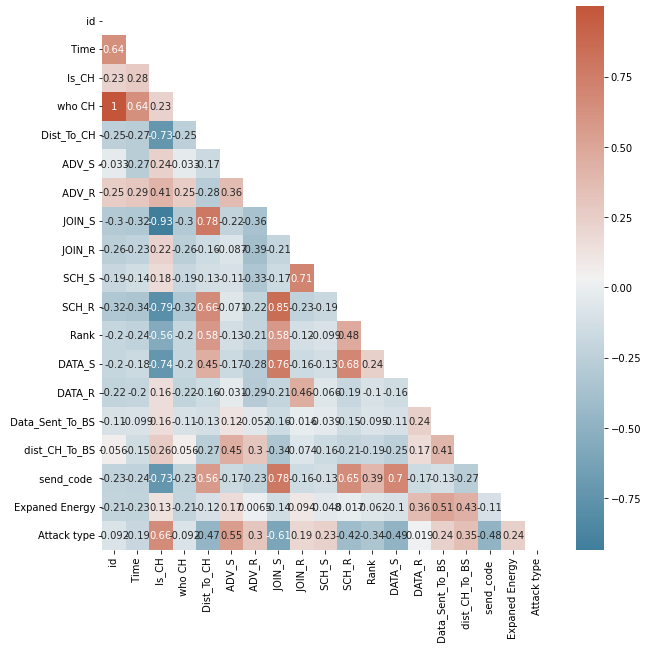

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation between different variables
corr = ndf.corr()
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(10, 10))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

# Setting X(features) and Y(Target)

In [11]:
Y = ndf[['Attack type']]

In [12]:
Y

Attack type
Attack type                  
0           0               0
            1               0
            2               0
            3               0
            4               0
...                       ...
4           3307            4
            3308            4
            3309            4
            3310            4
            3311            4

[16560 rows x 1 columns]

In [13]:
ndf.drop(ndf.columns[0], axis=1, inplace= True)

In [14]:
X= ndf.drop('Attack type', axis=1)

In [15]:
X.head()

Time   Is_CH   who CH   Dist_To_CH   ADV_S   ADV_R   JOIN_S  \
Attack type                                                                   
0           0   2100       0  1002100      0.00000       0       0        0   
            1    953       0   201060     81.02206       0       1        1   
            2   2953       0   801100      0.00000       0       0        0   
            3   1253       0   206021      2.44936       0       3        1   
            4    153       0   103005     19.52193       0       4        1   

                JOIN_R   SCH_S   SCH_R  Rank   DATA_S   DATA_R  \
Attack type                                                      
0           0        0       0       0     0       13      104   
            1        0       0       1    81       15        0   
            2        0       0       0     0       13      377   
            3        0       0       1    14       55        0   
            4        0       0       1     1       36        0   

                Data_Sent_To_BS   dist_CH_To_BS   send_code   Expaned Energy  
Attack type                                                                   
0           0                13        88.47785            0         0.21407  
            1                 2       107.20358            1         0.03273  
            2                13        92.58541            0         0.63885  
            3                 0         0.00000            3         0.09348  
            4                 0         0.00000            3         0.06381

In [16]:
num_classes=5

In [17]:
# from sklearn.preprocessing import label_binarize
# Y = label_binarize(Y, classes=[0,1,2,3])
# n_classes = 4 # if we binarize it, it is not possible to fit the model because of error:
# y should be a 1d array, got an array of shape (374661, 4) instead.



In [18]:
print(Y)

                  Attack type
Attack type                  
0           0               0
            1               0
            2               0
            3               0
            4               0
...                       ...
4           3307            4
            3308            4
            3309            4
            3310            4
            3311            4

[16560 rows x 1 columns]


In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.3, random_state=25, shuffle=True)

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(11592, 17) (11592, 1)
(4968, 17) (4968, 1)


In [20]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=100)
clf_dt.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=100)

In [21]:
dt_pred = clf_dt.predict(xtest)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_dt = accuracy_score(ytest, dt_pred)
print("Accuracy: {}".format(accuracy_dt))

Accuracy: 0.9698067632850241


In [23]:
import sklearn
from sklearn.metrics import classification_report
target_names = ["Normal", 'Grayhole', 'Blackhole', 'TDMA', 'Flooding']

#print(sklearn.metrics.classification_report(ytest, dt_pred, target_names=target_names))

## Classifying through Gaussian Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
ypred = gnb.fit(xtrain, ytrain.values.ravel()).predict(xtest) #training and testing the model

We recieved a warning : DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
So, .values.ravel() was used. Here .values will give the values in a numpy array (shape: (n,1)) and .ravel will convert that array shape to (n, ) (i.e. flatten it)

In [25]:
print(sklearn.metrics.classification_report(ytest, ypred, target_names=target_names))

              precision    recall  f1-score   support

      Normal       0.93      0.85      0.88      1008
    Grayhole       0.75      0.46      0.57       998
   Blackhole       0.53      0.98      0.69      1005
        TDMA       0.95      0.35      0.51       951
    Flooding       0.79      0.96      0.87      1006

    accuracy                           0.72      4968
   macro avg       0.79      0.72      0.71      4968
weighted avg       0.79      0.72      0.71      4968



## Classifying through Random Forest

In [26]:
import sklearn.ensemble as ske
classifier = ske.RandomForestClassifier(n_estimators=50)
classifier.fit(xtrain, ytrain.values.ravel())
rf_pred = classifier.predict(xtest)

In [27]:
print(sklearn.metrics.classification_report(ytest, rf_pred, target_names=target_names))

              precision    recall  f1-score   support

      Normal       0.94      0.98      0.96      1008
    Grayhole       0.98      0.98      0.98       998
   Blackhole       0.98      1.00      0.99      1005
        TDMA       0.99      0.93      0.96       951
    Flooding       1.00      1.00      1.00      1006

    accuracy                           0.98      4968
   macro avg       0.98      0.98      0.98      4968
weighted avg       0.98      0.98      0.98      4968



In [28]:
import shap
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(xtrain)

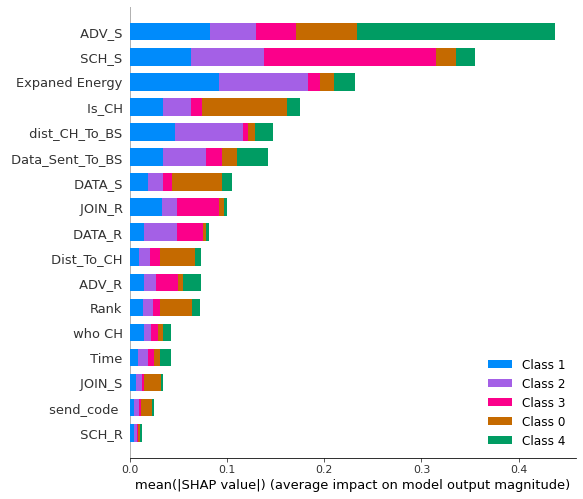

In [29]:
shap.summary_plot(shap_values, xtrain)

In [30]:
shap_values[0][371,:]

array([ 0.00300893, -0.06136073, -0.00168855, -0.02496048, -0.01061626,
       -0.00555609, -0.0122584 , -0.0006911 ,  0.01141965,  0.00084632,
       -0.02642021, -0.04299379, -0.00120937, -0.01636912,  0.00302961,
       -0.00516658, -0.00771119])

In [31]:
# shap.initjs()

# shap.force_plot(explainer.expected_value[0], shap_values[0], xtrain)

In [32]:
shap.initjs()

shap.force_plot(explainer.expected_value[0], shap_values[0][371,:], .iloc[371,:])


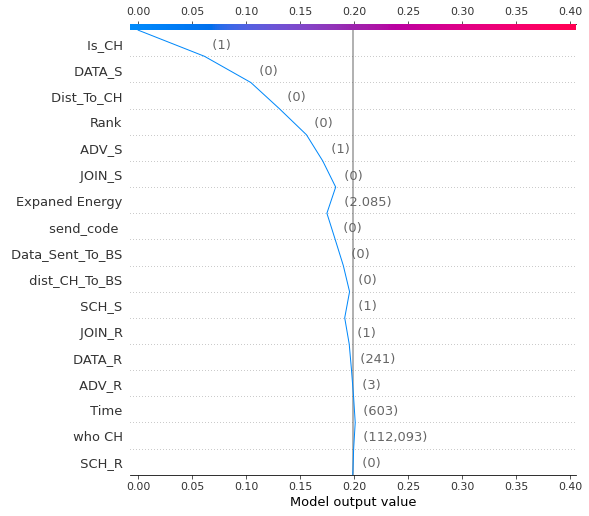

In [66]:
shap.decision_plot(explainer.expected_value[0], shap_values[0][1:2], xtrain[1:2],ignore_warnings=True)